In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
num_points = 20
x_values = [random.randint(0, 10) for _ in range(num_points)]
y_values = [random.randint(0, 10) for _ in range(num_points)]

print(x_values, y_values)


[3, 4, 10, 2, 9, 3, 0, 6, 8, 5, 9, 10, 1, 3, 4, 10, 10, 9, 3, 3] [0, 1, 5, 1, 8, 8, 8, 2, 10, 0, 3, 8, 7, 2, 4, 4, 7, 1, 2, 2]


In [16]:
X = np.array(x_values)
y = np.array(y_values)

# Creating Pandas DataFrame 
data = pd.DataFrame({'X': x_values, 'y': y_values})

In [17]:
#Calculating m and c
mean_x = data['X'].mean()
mean_y = data['y'].mean()
m = np.sum((data['X'] - mean_x) * (data['y'] - mean_y)) / np.sum((data['X'] - mean_x) ** 2)


sum_x = np.sum(data['X'])
sum_y = np.sum(data['y'])
sum_x_squared = np.sum(data['X'] ** 2)
sum_xy = np.sum(data['X'] * data['y'])
c = (sum_y * sum_x_squared - sum_x * sum_xy) / (sum_x_squared - sum_x ** 2)

print(m,c)

0.2073608617594255 -1.1388746365657603


In [18]:
# predicted the values of y
data['y_pred'] = m * data['X'] + c

#calculating mean squared error MSE
mse_training = np.mean((data['y'] - data['y_pred']) ** 2)
print(mse_training)


26.28602239042909


In [22]:
# generating test data
num_test_points = 10
X_test = np.array([random.uniform(0, 10) for _ in range(num_test_points)])
y_test = 3 * X_test

test_data = pd.DataFrame({'X_test': X_test, 'y_test': y_test})

# Calculate the predicted y values for test data
test_data['y_pred_test'] = m * test_data['X_test'] + c
print(test_data)

     X_test     y_test  y_pred_test
0  1.108400   3.325200    -0.909036
1  1.478541   4.435623    -0.832283
2  9.872164  29.616492     0.908226
3  7.186491  21.559474     0.351322
4  7.417113  22.251340     0.399144
5  6.740678  20.222033     0.258878
6  9.657372  28.972117     0.863686
7  9.594544  28.783633     0.850658
8  5.651629  16.954886     0.033052
9  9.173447  27.520342     0.763339


In [23]:
# MSE for test data
mse_test = np.mean((test_data['y_test'] - test_data['y_pred_test']) ** 2)
print(mse_test)

476.82964535588127


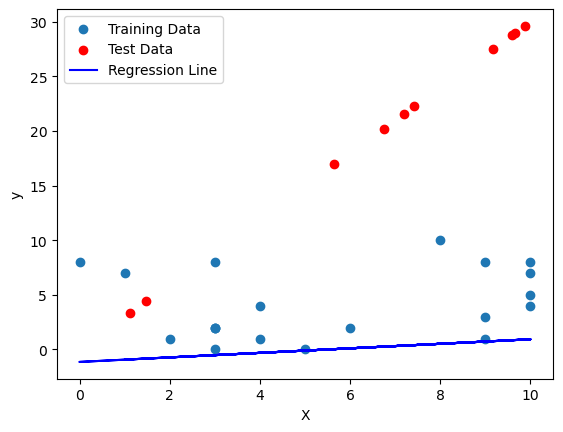

Training Data:
     X   y    y_pred  y_pred_gradient_descent
0    3   0 -0.516792                 2.641200
1    4   1 -0.309431                 3.061988
2   10   5  0.934734                 5.586719
3    2   1 -0.724153                 2.220412
4    9   8  0.727373                 5.165931
5    3   8 -0.516792                 2.641200
6    0   8 -1.138875                 1.378835
7    6   2  0.105291                 3.903565
8    8  10  0.520012                 4.745142
9    5   0 -0.102070                 3.482777
10   9   3  0.727373                 5.165931
11  10   8  0.934734                 5.586719
12   1   7 -0.931514                 1.799623
13   3   2 -0.516792                 2.641200
14   4   4 -0.309431                 3.061988
15  10   4  0.934734                 5.586719
16  10   7  0.934734                 5.586719
17   9   1  0.727373                 5.165931
18   3   2 -0.516792                 2.641200
19   3   2 -0.516792                 2.641200

Test Data:
     X_

In [26]:
# plotting the regression line 
plt.scatter(data['X'], data['y'], label='Training Data')
plt.scatter(test_data['X_test'], test_data['y_test'], color='red', label='Test Data')
plt.plot(data['X'], data['y_pred'], color='blue', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Display the training data, test data, and MSE results using Pandas DataFrames
print("Training Data:")
print(data)

print("\nTest Data:")
print(test_data)

results_df = pd.DataFrame({
    'MSE Training': [mse_training],
    'MSE Test': [mse_test]
})

print("\nResults:")
print(results_df)

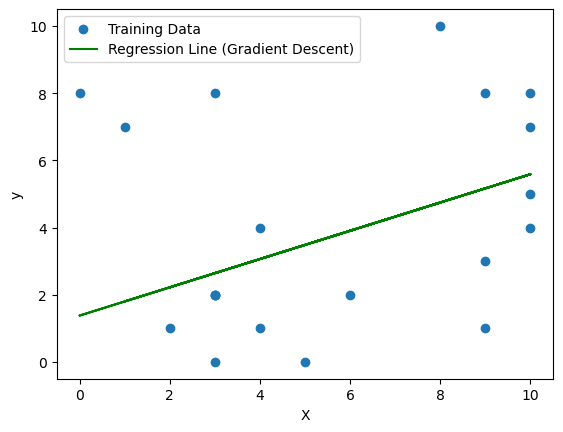


Results after Gradient Descent:
   MSE Gradient Descent  Theta0 Gradient Descent  Theta1 Gradient Descent
0              9.927956                 1.378835                 0.420788


In [25]:
theta0 = random.uniform(0, 1)
theta1 = random.uniform(0, 1)
learning_rate = 0.001
num_iterations = 1000

for _ in range(num_iterations):
    y_pred_gradient = theta0 + theta1 * data['X']
    gradient_theta0 = -2 * np.mean(data['y'] - y_pred_gradient)
    gradient_theta1 = -2 * np.mean((data['y'] - y_pred_gradient) * data['X'])

    theta0 -= learning_rate * gradient_theta0
    theta1 -= learning_rate * gradient_theta1

# Calculate the predicted y values using updated theta values
data['y_pred_gradient_descent'] = theta0 + theta1 * data['X']

# Calculate Mean Squared Error (MSE) for training data with Gradient Descent
mse_gradient_descent = np.mean((data['y'] - data['y_pred_gradient_descent']) ** 2)

# Visualize the regression line on data points after Gradient Descent
plt.scatter(data['X'], data['y'], label='Training Data')
plt.plot(data['X'], data['y_pred_gradient_descent'], color='green', label='Regression Line (Gradient Descent)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Display the results of Gradient Descent using Pandas DataFrame
results_gradient_descent_df = pd.DataFrame({
    'MSE Gradient Descent': [mse_gradient_descent],
    'Theta0 Gradient Descent': [theta0],
    'Theta1 Gradient Descent': [theta1]
})

print("\nResults after Gradient Descent:")
print(results_gradient_descent_df)